In [1]:
import os
import librosa
import librosa.display
import json 
import importlib
import formExtractor as fem
importlib.reload(fem)
import matplotlib.pyplot as plt

In [2]:
import numpy as np
np.version.version

'2.0.2'

In [3]:
def load_audio_files(path):
    audio_files = []
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".mp3"):
                audio_files.append(os.path.join(root, file))
    return audio_files

In [4]:
path = '/home/laura/aimir/'
collection = 'suno' #lastfm, suno, udio
song_files = path + collection + '/audio'
files = load_audio_files(song_files)
print(len(files))

96365


In [5]:
myFiles = files[:20]

In [6]:
id = 1
song = myFiles[id]

#song = '/home/laura/aimir/boomy/audio/14065870.mp3'
id_file = song.split('/')[-1].split('.')[0]
song

'/home/laura/aimir/suno/audio/0002d6bf-36e5-4f04-a075-5476f06b2c49.mp3'

In [7]:
# print metadata
md = path + collection + '/metadata/' + id_file + '.json'

with open(md) as json_file:
    data = json.load(json_file)
    
    # Calculate the maximum key length
    max_key_length = max(len(key) for key in data.keys())
    
    # Print each line with keys aligned
    for key in data:
        print(f"{key:{max_key_length}} : {data[key]}")

id                             : 0002d6bf-36e5-4f04-a075-5476f06b2c49
video_url                      : https://cdn1.suno.ai/0002d6bf-36e5-4f04-a075-5476f06b2c49.mp4
audio_url                      : https://cdn1.suno.ai/0002d6bf-36e5-4f04-a075-5476f06b2c49.mp3
image_url                      : https://cdn2.suno.ai/image_0002d6bf-36e5-4f04-a075-5476f06b2c49.jpeg
image_large_url                : https://cdn2.suno.ai/image_large_0002d6bf-36e5-4f04-a075-5476f06b2c49.jpeg
is_video_pending               : False
major_model_version            : v3.5
model_name                     : chirp-v3
is_liked                       : False
user_id                        : 0b19b61c-6c5f-424f-bbcd-3be6b8b97fa0
display_name                   : AbstractCastanets7859
handle                         : abstractcastanets7859
is_handle_updated              : False
avatar_image_url               : https://cdn1.suno.ai/defaultPink.webp
is_trashed                     : False
reaction                       : nan
create

In [8]:
formData = fem.formExtractor()

y, sr = librosa.load(song)

In [9]:
# Extract chroma features
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
# Aggregate chroma features by averaging over time
chroma_mean = np.mean(chroma, axis=1)

In [10]:
# Krumhansl-Schmuckler key profiles
major_profile = np.array([6.35, 2.23, 3.48, 2.33, 4.38, 4.09, 2.52,
                          5.19, 2.39, 3.66, 2.29, 2.88])

minor_profile = np.array([6.33, 2.68, 3.52, 5.38, 2.60, 3.53, 2.54,
                          4.75, 3.98, 2.69, 3.34, 3.17])

In [11]:
# Initialize lists to store correlation scores
correlations = []

# Iterate over all 12 keys
keys = ['C', 'C#', 'D', 'D#', 'E', 'F',
        'F#', 'G', 'G#', 'A', 'A#', 'B']
modes = ['major', 'minor']

for i, key in enumerate(keys):
    # Rotate the key profiles to match the current key
    rotated_major = np.roll(major_profile, i)
    rotated_minor = np.roll(minor_profile, i)
    
    # Compute correlations
    corr_major = np.corrcoef(chroma_mean, rotated_major)[0, 1]
    corr_minor = np.corrcoef(chroma_mean, rotated_minor)[0, 1]
    
    correlations.append((f"{key} major", corr_major))
    correlations.append((f"{key} minor", corr_minor))

# Sort keys by correlation score
correlations.sort(key=lambda x: x[1], reverse=True)

# Print top 5 key suggestions
print("Top 5 key detections:")
for key, score in correlations[:5]:
    print(f"{key}: {score:.4f}")

#get the first tonality in the list
tonality = correlations[0][0]


Top 5 key detections:
B minor: 0.6581
A major: 0.5872
F# minor: 0.5674
D major: 0.5637
E major: 0.3180


In [12]:
C = formData.amplitud_to_db(y, sr, False)

In [13]:
#Example 1, calculate all the features and save them

#path = '/home/laura/aimir/suno/form/'
#K = 2
#data_dict = formData.getFormAndSave(K, song, id_file, path)

# Call the plotSpectrogram function
#plotMe.plotSpectrogram(sr, C, chords, bars, bound_frames, new_bound_segs, BINS_PER_OCTAVE, 40, 5)

#plotMe.plotWaveform(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 40, 5) #last two numbers are the size of the plot in inches

#from IPython.display import Audio
#Audio(song)

In [14]:
Csync, beats, beat_times = formData.sync(y, sr, C)

Threshold: 0.0


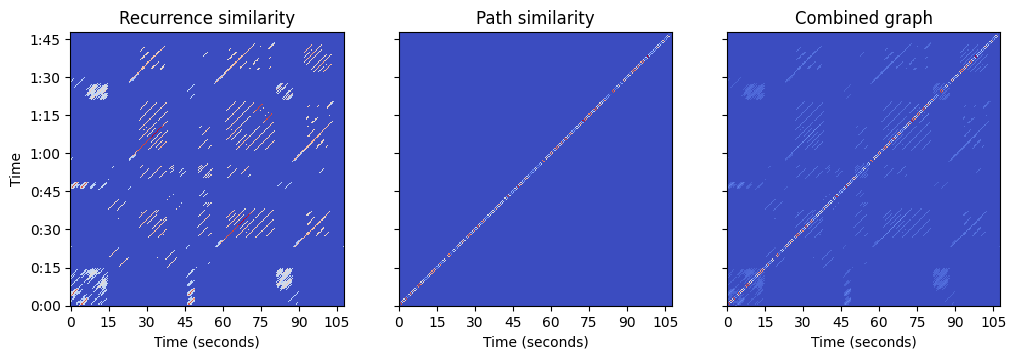

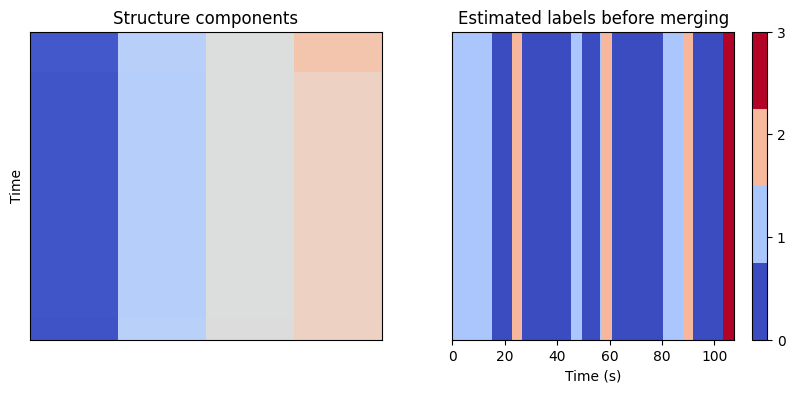

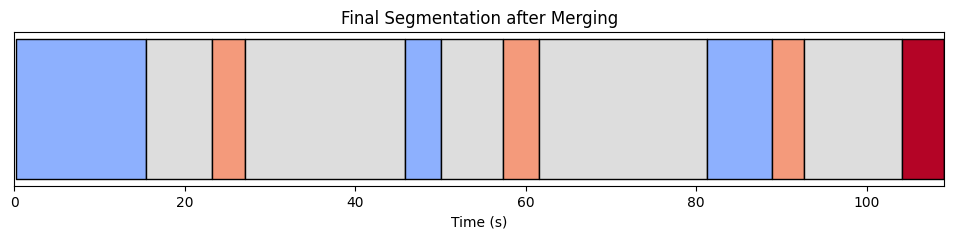

In [15]:
import formExtractor as fem

# Recreate the instance after reloading
formData = fem.formExtractor()

K = 4 #If we want k clusters, use the first k normalized eigenvectors.
min_duration = 3.5  # Minimum segment duration in seconds

#bound_frames, bound_segs = formData.laplacian(y, sr, C, Csync, beats, beat_times, K, True, 0.0) #True to plot the laplacian

bound_frames, bound_segs = formData.laplacian_2(y, sr, C, Csync, beats, beat_times, K, plotIt=True, min_duration=min_duration)

In [16]:
# get triads
chord_progression = formData.getChords(song)
bars = formData.getBars(song)

print(chord_progression)
#print the chords and the bars
# for chord in chord_progression:
#     print(chord)

{'useNNLS': 1, 'rollon': 1, 'tuningmode': 1, 'whitening': 0.8, 's': 0.6, 'boostn': 0.1}
[ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='D6', timestamp=0.464399092), ChordChange(chord='Em', timestamp=0.835918367), ChordChange(chord='G', timestamp=1.207437641), ChordChange(chord='D', timestamp=2.136235827), ChordChange(chord='A', timestamp=3.065034013), ChordChange(chord='D6', timestamp=3.90095238), ChordChange(chord='Em', timestamp=4.643990929), ChordChange(chord='Bm', timestamp=5.108390022), ChordChange(chord='G', timestamp=5.572789115), ChordChange(chord='D', timestamp=5.94430839), ChordChange(chord='Am', timestamp=7.151746031), ChordChange(chord='Dmaj7', timestamp=7.430385487), ChordChange(chord='B', timestamp=7.801904761), ChordChange(chord='C#m7b5/B', timestamp=8.452063492), ChordChange(chord='G', timestamp=8.823582766), ChordChange(chord='D', timestamp=9.566621315), ChordChange(chord='Am', timestamp=10.495419501), ChordChange(chord='Bm', timestamp=11.052698412),

In [17]:
# Create templates for major, minor, and no-chord qualities
maj_template = np.array([1,0,0, 0,1,0, 0,1,0, 0,0,0])
min_template = np.array([1,0,0, 1,0,0, 0,1,0, 0,0,0])
N_template   = np.array([1,1,1, 1,1,1, 1,1,1, 1,1,1.]) / 4.
    
labels = ['C', 'C#', 'D', 'D#', 'E', 'F',
            'F#', 'G', 'G#', 'A', 'A#', 'B',
            'Cm', 'C#m', 'Dm', 'D#m', 'Em', 'Fm',
            'F#m', 'Gm', 'G#m', 'Am', 'A#m', 'Bm',
            'N']

In [18]:
# Generate the weighting matrix that maps chroma to labels
weights = np.zeros((25, 12), dtype=float)

for c in range(12):
    weights[c, :] = np.roll(maj_template, c) # c:maj
    weights[c + 12, :] = np.roll(min_template, c)  # c:min
weights[-1] = N_template  # the last row is the no-chord class
# Make a self-loop transition matrix over 25 states
trans = librosa.sequence.transition_loop(25, 0.99)

y, sr = librosa.load(song)
# Suppress percussive elements
y = librosa.effects.harmonic(y, margin=1)
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
# Map chroma (observations) to class (state) likelihoods
probs = np.exp(weights.dot(chroma))  # P[class | chroma] ~= exp(template' chroma)
probs /= probs.sum(axis=0, keepdims=True)  # probabilities must sum to 1 in each column
# And viterbi estimates
chords_vit = librosa.sequence.viterbi_discriminative(probs, trans)
#convert the viterbi estimates to chord names
chord_list = [labels[chord] for chord in chords_vit]

#print timestamps
times = librosa.times_like(chords_vit)

#unify in a tuple(chord symbol, timestamp)
cp = list(zip(chord_list, times))

# Filtered chord progression
filtered_cp = []

# Iterate through the original chord progression
for i, (chord, timestamp) in enumerate(cp):
    # Add the first chord or if the current chord is different from the last added chord
    if i == 0 or chord != cp[i-1][0]:
        filtered_cp.append((chord, float(timestamp)))

print(filtered_cp)


[('Bm', 0.0), ('A', 2.043356009070295), ('Bm', 4.040272108843538), ('D', 5.7817687074829935), ('A', 6.222947845804988), ('G', 7.778684807256236), ('D', 9.496961451247165), ('A', 10.588299319727891), ('G', 11.493877551020407), ('A', 13.212154195011339), ('G', 15.09297052154195), ('D', 17.41496598639456), ('G', 19.11002267573696), ('D', 21.199818594104308), ('Bm', 25.890249433106575), ('G', 27.70140589569161), ('Dm', 28.93206349206349), ('G', 30.67356009070295), ('Dm', 32.74013605442177), ('G', 34.27265306122449), ('D', 36.13024943310658), ('G', 38.54512471655329), ('Dm', 40.4259410430839), ('G', 42.26031746031746), ('Am', 45.255691609977326), ('Bm', 46.04517006802721), ('D', 48.01886621315193), ('A', 48.46004535147392), ('G', 49.412063492063496), ('Dm', 51.54829931972789), ('G', 53.661315192743764), ('F#m', 56.099410430839), ('E', 56.58702947845805), ('F#m', 58.026666666666664), ('Bm', 59.90748299319728), ('G', 62.27591836734694), ('Dm', 63.48335600907029), ('G', 65.22485260770975), ('D

In [19]:
from collections import namedtuple

# Define the named tuple structure for ChordChange
ChordChange = namedtuple('ChordChange', ['chord', 'timestamp'])

# Convert to list of ChordChange named tuples
chord_changes = [ChordChange(chord=chord, timestamp=timestamp) for chord, timestamp in filtered_cp]

# Print the result
print(chord_changes)


[ChordChange(chord='Bm', timestamp=0.0), ChordChange(chord='A', timestamp=2.043356009070295), ChordChange(chord='Bm', timestamp=4.040272108843538), ChordChange(chord='D', timestamp=5.7817687074829935), ChordChange(chord='A', timestamp=6.222947845804988), ChordChange(chord='G', timestamp=7.778684807256236), ChordChange(chord='D', timestamp=9.496961451247165), ChordChange(chord='A', timestamp=10.588299319727891), ChordChange(chord='G', timestamp=11.493877551020407), ChordChange(chord='A', timestamp=13.212154195011339), ChordChange(chord='G', timestamp=15.09297052154195), ChordChange(chord='D', timestamp=17.41496598639456), ChordChange(chord='G', timestamp=19.11002267573696), ChordChange(chord='D', timestamp=21.199818594104308), ChordChange(chord='Bm', timestamp=25.890249433106575), ChordChange(chord='G', timestamp=27.70140589569161), ChordChange(chord='Dm', timestamp=28.93206349206349), ChordChange(chord='G', timestamp=30.67356009070295), ChordChange(chord='Dm', timestamp=32.740136054421

In [21]:
import triadExtractor as te
triads = te.TriadExtractor(hop_length=512)
chords = triads.extract_chords(song, threshold=0.15, check_on_beat=True) #window_range minimum is 1

In [22]:
data_dict = formData.populateDict(sr, chords, bars, bound_frames, bound_segs)

Plot the Song Form

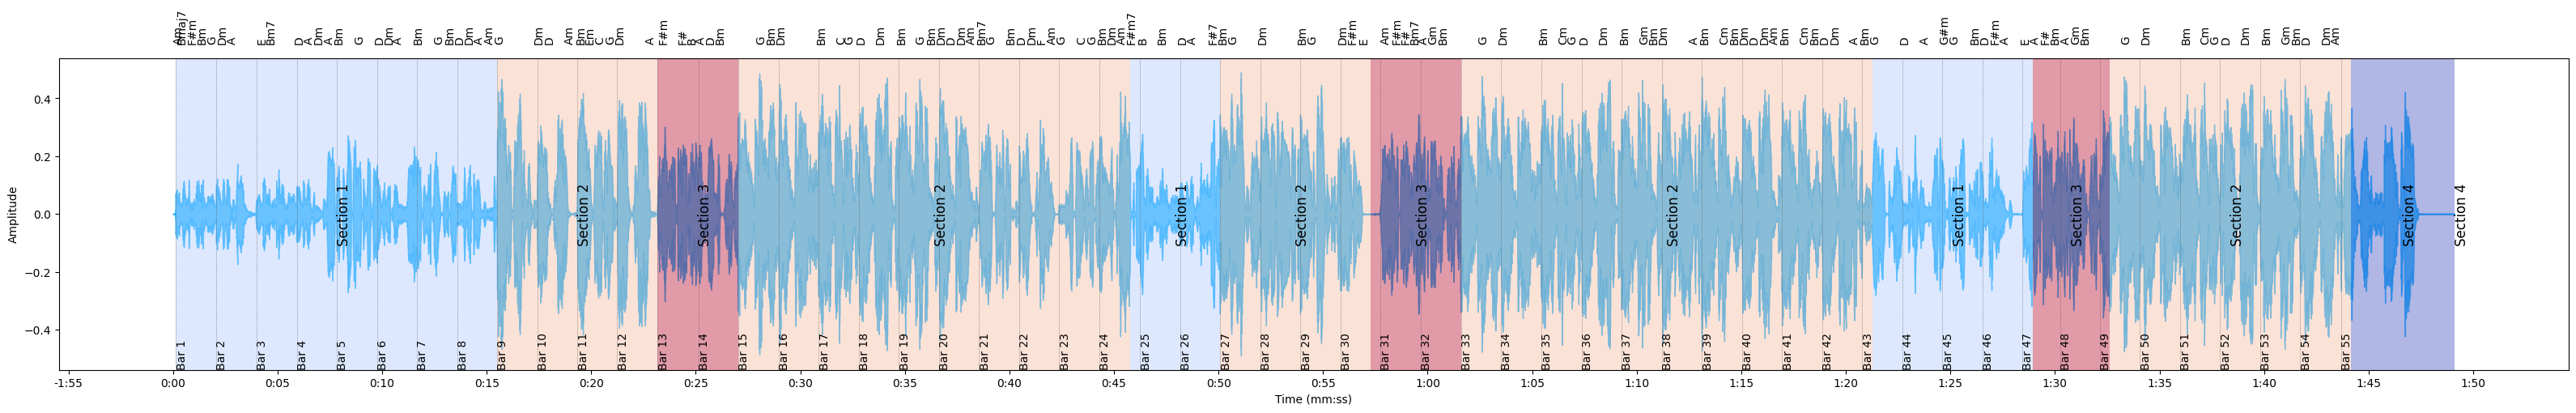

In [23]:
import plotMe
importlib.reload(plotMe)

# Call the plotSpectrogram function
#plotMe.plotSpectrogram(sr, C, chords, bars, bound_frames, new_bound_segs, BINS_PER_OCTAVE, 40, 5)

plotMe.plotWaveform(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 40, 5, 'coolwarm') #last two numbers are the size of the plot in inches

from IPython.display import Audio
Audio(song)

In [247]:
#The array contains a dictionary [ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='C#m', timestamp=0.464399092), print only the chord
print([chord.chord for chord in chord_progression])

['N', 'D6', 'Em', 'G', 'D', 'A', 'D6', 'Em', 'Bm', 'G', 'D', 'Am', 'Dmaj7', 'B', 'C#m7b5/B', 'G', 'D', 'Am', 'Bm', 'G', 'C#dim', 'Dmaj7', 'A', 'Bm', 'G', 'D', 'Bm7b5/A', 'Am6', 'Bm', 'Gmaj7', 'Em', 'Am6', 'Am', 'D6', 'F#m', 'D6', 'D', 'Bm', 'Bm', 'Gmaj7', 'Bm', 'D', 'Bm7b5/A', 'Bm7', 'G6', 'Bm', 'D', 'A', 'Bm7b5/A', 'Bm', 'Gmaj7', 'Gdim', 'D', 'A', 'G', 'D', 'B/A', 'G6', 'D', 'A6', 'Bm', 'Em', 'Bm', 'G', 'D', 'Am', 'Bm', 'Bdim', 'G6', 'A7/C#', 'Dm', 'Amaj7', 'D/A', 'Bm', 'Gm', 'D6', 'F#m7', 'D6', 'F#m', 'D6', 'Bm', 'Bm', 'Gmaj7', 'Bm', 'D', 'A', 'Bm7b5/A', 'Bm7', 'Em', 'Bm', 'C#m7b5', 'D', 'A', 'Bm7b5/A', 'Bm', 'Gmaj7', 'Gdim', 'D', 'A', 'Bm', 'Gmaj7', 'Bm', 'D', 'A', 'Bmaj7', 'Bm', 'Gmaj7', 'Bm', 'D', 'Aaug', 'Bm', 'G', 'D', 'A', 'C#7', 'G', 'D', 'Am', 'B7', 'F#m', 'D6', 'Bm', 'Bm', 'Gmaj7', 'Bm', 'D', 'A', 'Bm7b5/A', 'Bm7', 'Em', 'Bm', 'C#m7b5', 'D', 'A', 'Bm7b5/A', 'Bm', 'Gmaj7', 'Gdim', 'D', 'A', 'Bm7', 'Gmaj7', 'D/A', 'A', 'N']


In [248]:
#print the chords only
thisChord = [chord.chord for chord in chord_progression]
thisTimestamp = [chord.timestamp for chord in chord_progression]
print(len(thisChord), len(thisTimestamp))

#align both lists
final_CP = list(zip(thisChord, thisTimestamp))
print(final_CP)

145 145
[('N', 0.371519274), ('D6', 0.464399092), ('Em', 0.835918367), ('G', 1.207437641), ('D', 2.136235827), ('A', 3.065034013), ('D6', 3.90095238), ('Em', 4.643990929), ('Bm', 5.108390022), ('G', 5.572789115), ('D', 5.94430839), ('Am', 7.151746031), ('Dmaj7', 7.430385487), ('B', 7.801904761), ('C#m7b5/B', 8.452063492), ('G', 8.823582766), ('D', 9.566621315), ('Am', 10.495419501), ('Bm', 11.052698412), ('G', 12.353015873), ('C#dim', 13.281814058), ('Dmaj7', 13.653333332999999), ('A', 14.675011337), ('Bm', 15.325170068), ('G', 16.068208616), ('D', 17.461405895), ('Bm7b5/A', 18.390204081), ('Am6', 18.854603174), ('Bm', 19.226122448), ('Gmaj7', 19.969160997), ('Em', 20.805079365), ('Am6', 21.269478458), ('Am', 21.733877551), ('D6', 23.127074829), ('F#m', 23.591473922), ('D6', 24.613151927), ('D', 25.07755102), ('Bm', 25.72770975), ('Bm', 26.842267573), ('Gmaj7', 27.678185941), ('Bm', 28.421224489), ('D', 28.978503401), ('Bm7b5/A', 29.907301587), ('Bm7', 30.650340136), ('G6', 31.57913832

In [249]:
#plotMe.plotSections(y, data_dict['sr'], data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'], 20, 5, 64) #20 and 5 are the size of the plot in inches, and 32 is the number of bars to plot

In [250]:
#plotMe.plotChordsBars(data_dict['chords'], data_dict['bars'], data_dict['bound_frames'], data_dict['bound_segs'])

In [251]:
#Get the tonality of the song
# Compute the chroma features using CQT
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)

# Sum chroma features over time to emphasize prominent pitches
chroma_vector = np.sum(chroma_cq, axis=1)
chroma_vector /= np.linalg.norm(chroma_vector)

# Modified Krumhansl-Schmuckler key profiles
major_profile = np.array([6.35, 2.23, 3.48, 2.33, 4.38, 4.09,
                          2.52, 5.19, 2.39, 3.66, 2.29, 2.88])
minor_profile = np.array([6.33, 2.68, 3.52, 5.38, 2.60, 3.53,
                          2.54, 4.75, 3.98, 2.69, 3.34, 3.17])

# Optionally adjust profiles
# minor_profile[0] *= 1.2  # Emphasize tonic in minor

# Normalize the profiles
major_profile /= np.linalg.norm(major_profile)
minor_profile /= np.linalg.norm(minor_profile)

key_names = ['C', 'C#', 'D', 'D#', 'E', 'F',
             'F#', 'G', 'G#', 'A', 'A#', 'B']
correlations = []

for i in range(12):
    # Rotate the key profiles
    major_profile_rotated = np.roll(major_profile, i)
    minor_profile_rotated = np.roll(minor_profile, i)

    # Compute the correlation with adjusted weights
    major_corr = np.dot(chroma_vector, major_profile_rotated) * 0.9
    minor_corr = np.dot(chroma_vector, minor_profile_rotated) * 1.1  # Increase minor influence

    correlations.append({
        'key': key_names[i],
        'mode': 'major',
        'correlation': major_corr
    })
    correlations.append({
        'key': key_names[i],
        'mode': 'minor',
        'correlation': minor_corr
    })

# Find the best matching key
best_match = max(correlations, key=lambda x: x['correlation'])
tonality = f"{best_match['key']} {best_match['mode']}"
print(f"Tonality: {tonality}")

# Sort correlations in descending order
correlations_sorted = sorted(correlations, key=lambda x: x['correlation'], reverse=True)
print("Correlation scores for all keys:")
for corr in correlations_sorted:
    print(f"{corr['key']} {corr['mode']}: {corr['correlation']:.4f}")


Tonality: B minor
Correlation scores for all keys:
B minor: 1.0813
F# minor: 1.0505
D minor: 1.0458
E minor: 1.0240
G minor: 1.0235
A minor: 1.0224
D# minor: 0.9938
C# minor: 0.9930
G# minor: 0.9899
C minor: 0.9786
A# minor: 0.9686
F minor: 0.9448
D major: 0.8898
G major: 0.8622
A major: 0.8564
B major: 0.8206
E major: 0.8172
F# major: 0.8064
C major: 0.8055
F major: 0.7985
A# major: 0.7966
D# major: 0.7762
C# major: 0.7723
G# major: 0.7590


In [252]:
from music21 import key, harmony, roman
from IPython.display import Audio

# Define the key context explicitly as C major
mykey = tonality.split(' ')[0]
mymode = tonality.split(' ')[1]
print(mykey, mymode)
song_key = key.Key(mykey, mymode)

#print(f"Key: {song_key.tonic.name} {song_key.mode}")

#The array contains a dictionary [ChordChange(chord='N', timestamp=0.371519274), ChordChange(chord='C#m', timestamp=0.464399092), save the tuple with the function and its location in the timestamp
functional_harmony = []

for chord_name, timestamp in (filtered_cp):
    if chord_name == 'N':
        # Skip any chords labeled as N
        functional_harmony.append(('N', timestamp))
        continue
    else:   
        # Create a ChordSymbol object to correctly interpret chord qualities
        chord_symbol = harmony.ChordSymbol(chord_name)
        
        # Convert the chord symbol to a Roman numeral based on the key
        roman_numeral = roman.romanNumeralFromChord(chord_symbol, song_key)
     
        # Append the Roman numeral and timestamp to the list
        functional_harmony.append((roman_numeral.figure, timestamp))
   
print(functional_harmony)

from IPython.display import Audio
Audio(song)

B minor
[('i', 0.0), ('bVII', 2.043356009070295), ('i', 4.040272108843538), ('III', 5.7817687074829935), ('bVII', 6.222947845804988), ('bVI', 7.778684807256236), ('III', 9.496961451247165), ('bVII', 10.588299319727891), ('bVI', 11.493877551020407), ('bVII', 13.212154195011339), ('bVI', 15.09297052154195), ('III', 17.41496598639456), ('bVI', 19.11002267573696), ('III', 21.199818594104308), ('i', 25.890249433106575), ('bVI', 27.70140589569161), ('iii', 28.93206349206349), ('bVI', 30.67356009070295), ('iii', 32.74013605442177), ('bVI', 34.27265306122449), ('III', 36.13024943310658), ('bVI', 38.54512471655329), ('iii', 40.4259410430839), ('bVI', 42.26031746031746), ('bvii', 45.255691609977326), ('i', 46.04517006802721), ('III', 48.01886621315193), ('bVII', 48.46004535147392), ('bVI', 49.412063492063496), ('iii', 51.54829931972789), ('bVI', 53.661315192743764), ('v', 56.099410430839), ('IV', 56.58702947845805), ('v', 58.026666666666664), ('i', 59.90748299319728), ('bVI', 62.27591836734694),

In [253]:
#get the name of folder where the data will be saved
myFolder = os.getcwd().split('src')[0]
thisPath = myFolder + collection + '/'
formData.saveData(data_dict, id_file, thisPath, tonality, functional_harmony)

In [254]:
#compare final_CP and filtered_cp by aligning its timestamps
final = []
limit = 0.25 # Define the time limit for alignment

# Loop through each chord and timestamp in filtered_cp
for chord, timestamp in filtered_cp:
    match_found = False  # To check if a match is found within the limit
    
    # Loop through each chord and timestamp in final_CP
    for chord2, timestamp2 in chords:
        # Check if the timestamp2 is within the range defined by 'limit'
        if timestamp - limit < timestamp2 < timestamp + limit:
            final.append((chord, chord2, timestamp))
            match_found = True  # A match is found, no need to add 'N'
            break  # Exit the inner loop when a match is found
    
    # If no match was found in the inner loop, append 'N' as the second chord
    if not match_found:
        final.append((chord, 'N', timestamp))

# Print the final aligned chord list
for element in final:
    print(element)


NameError: name 'chords' is not defined

/tmp/ipykernel_443803/3748616781.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


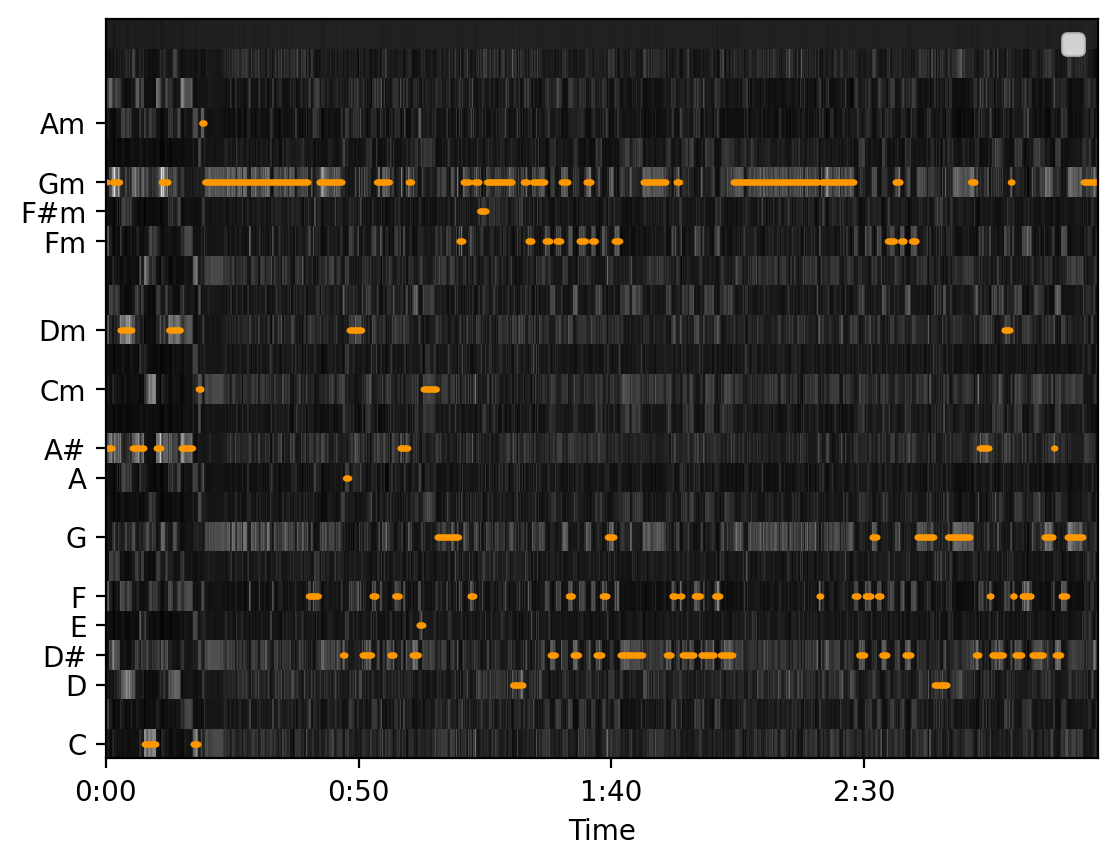

In [42]:
# And plot the results
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (14,4)
fontsize=20
librosa.display.specshow(probs, x_axis='time', cmap='gray', ax=ax)
times = librosa.times_like(chords_vit)
ax.scatter(times, chords_vit, color='#ff9900', alpha=0.5, marker='o', s=1)
ax.set(yticks=np.unique(chords_vit), yticklabels=[labels[i] for i in np.unique(chords_vit)])
ax.legend()

Apply eigenface analysis. Make a average matrix segmentation. Scale all to 0 to 1. NMF 